In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

### Handling Missing Values.

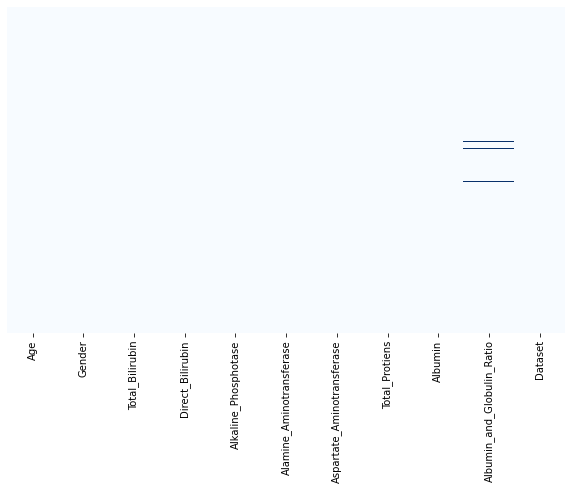

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cbar=False,cmap='Blues',yticklabels=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df['Albumin_and_Globulin_Ratio'].mean().round(2)

0.95

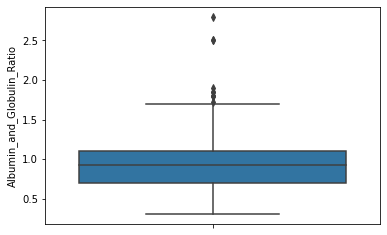

In [8]:
sns.boxplot(y=df['Albumin_and_Globulin_Ratio'])

In [9]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean().round(2),inplace=True)

### Handling Categorical Values.

In [10]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
gender.head()

,Male
0,0
1,1
2,1
3,1
4,1


In [12]:
df.drop('Gender',axis=1,inplace=True)

In [13]:
df1=pd.concat([df,gender],axis=1)

In [14]:
df1.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [15]:
df1.shape

(583, 11)

In [16]:
data=df1.drop('Dataset',axis=1)
target=df1['Dataset']

In [17]:
data.shape,target.shape

((583, 10), (583,))

### Handling Imbalance dataset.

In [18]:
df1['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros= RandomOverSampler(sampling_strategy=1.0,random_state=42)
X,Y=ros.fit_sample(data,target)

In [21]:
X.shape,Y.shape

((832, 10), (832,))

In [22]:
Y.value_counts()

2    416
1    416
Name: Dataset, dtype: int64

### Exploratory Data Analysis.

In [23]:
df2=pd.concat([X,Y],axis=1)

In [24]:
df2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


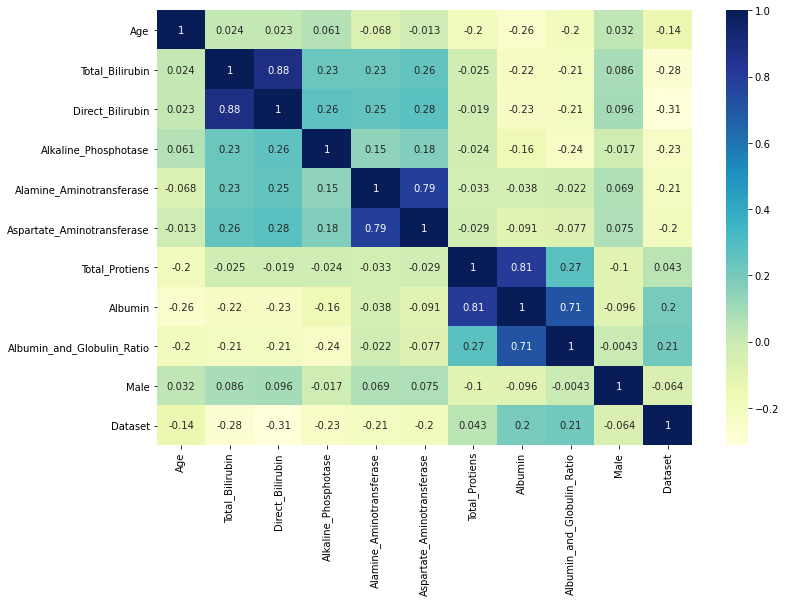

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='YlGnBu')

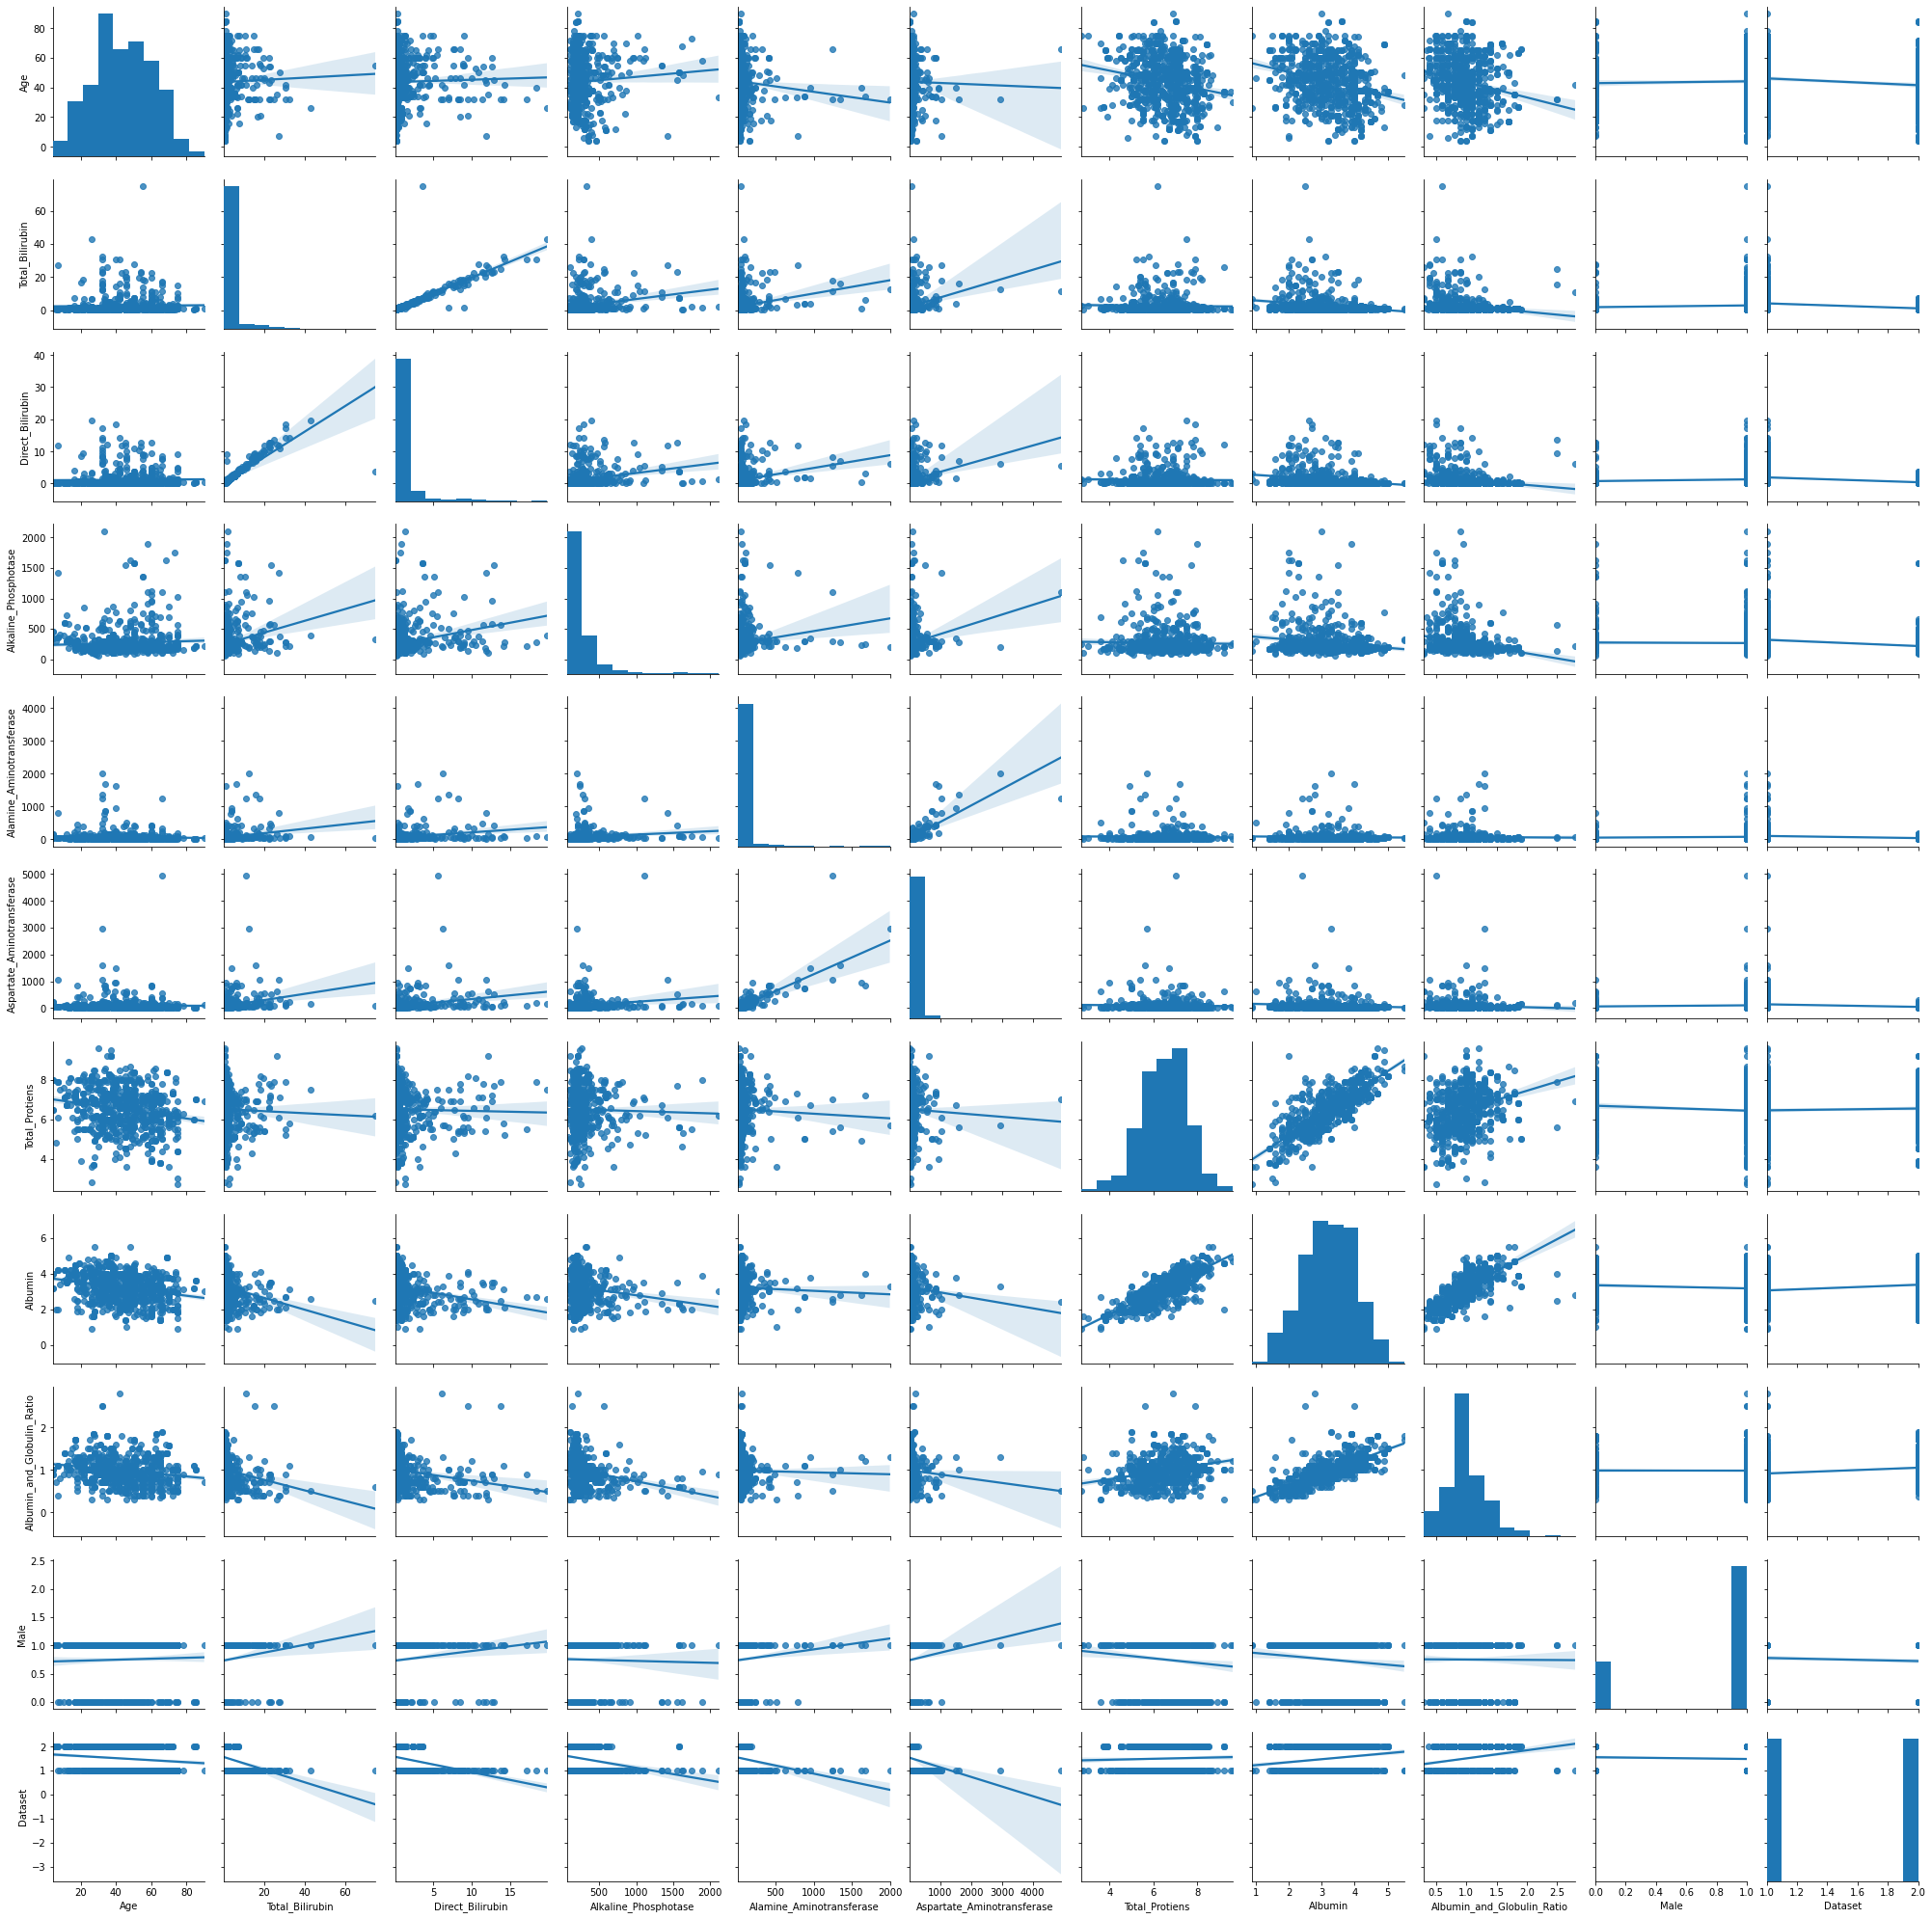

In [26]:
sns.pairplot(df2,kind='reg')

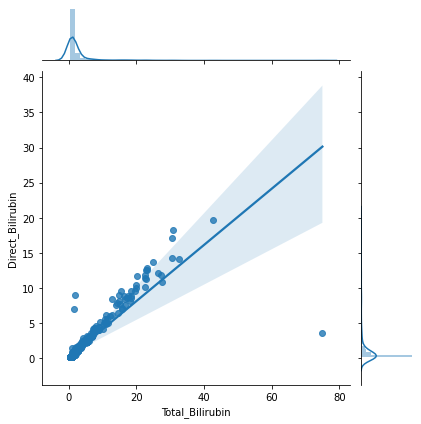

In [27]:
sns.jointplot(x='Total_Bilirubin',y='Direct_Bilirubin',data=df2,kind='reg')

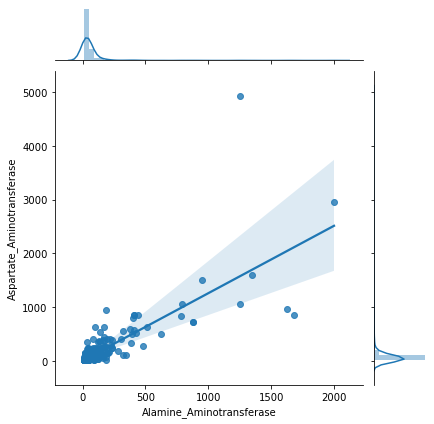

In [28]:
sns.jointplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',data=df2,kind='reg')

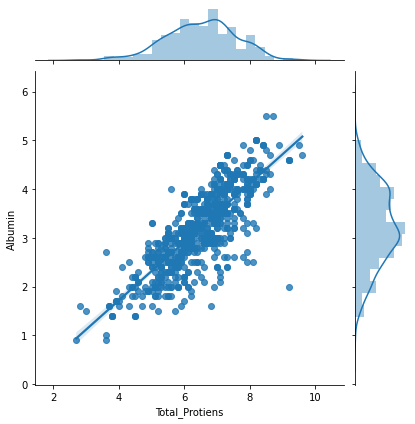

In [29]:
sns.jointplot(x='Total_Protiens',y='Albumin',data=df2,kind='reg')

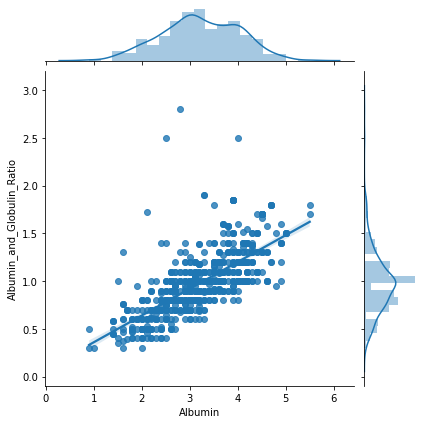

In [30]:
sns.jointplot(y='Albumin_and_Globulin_Ratio',x='Albumin',data=df2,kind='reg')

In [31]:
df3=pd.read_csv('G:/Stuff/indian_liver_patient.csv')

In [32]:
df3.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


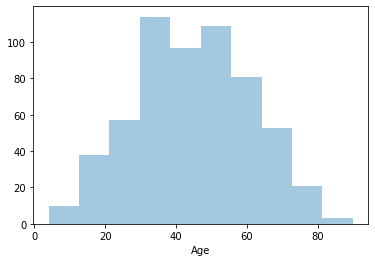

In [33]:
sns.distplot(df3['Age'],kde=False,bins=10)

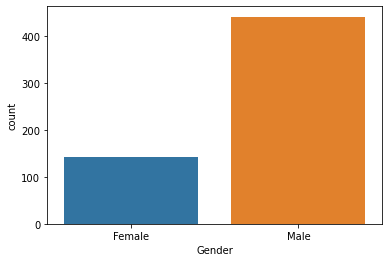

In [34]:
sns.countplot(df3['Gender'])

In [35]:
df3['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

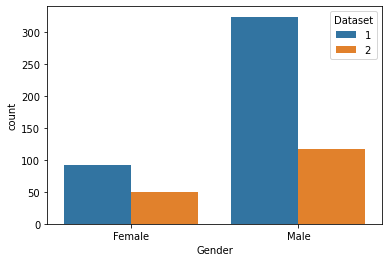

In [36]:
sns.countplot(x='Gender',data=df3,hue='Dataset')

In [37]:
len(df3[(df3['Gender']=='Male') & (df3['Dataset']==1)])

324

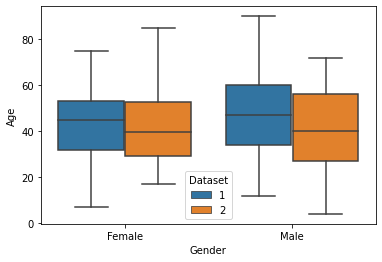

In [38]:
sns.boxplot(x='Gender',y='Age',data=df3,hue='Dataset')

In [39]:
df3[(df3['Gender']=='Male') & (df3['Dataset']==1)]['Age'].mean().round()

47.0

### Model Creation.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [41]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,random_state=0,test_size=0.3)

In [42]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

c:\software\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
RF=RandomForestClassifier(max_depth=5)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [45]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
y_predict_LR=LR.predict(x_test)

In [47]:
y_predict_RF=RF.predict(x_test)

In [48]:
y_predict_XGB=XGB.predict(x_test)

In [49]:
y_predict_KNN=KNN.predict(x_test)

### Checking Accuracy for TEST data.

In [50]:
LR.score(x_test,y_test)*100

70.0

In [51]:
RF.score(x_test,y_test)*100

75.2

In [52]:
XGB.score(x_test,y_test)*100

83.2

In [53]:
KNN.score(x_test,y_test)*100

78.0

### Checking Accuracy for TRAIN data.

In [54]:
LR.score(x_train,y_train)*100

67.86941580756015

In [55]:
RF.score(x_train,y_train)*100

81.78694158075601

In [56]:
XGB.score(x_train,y_train)*100

100.0

In [57]:
KNN.score(x_train,y_train)*100

100.0

### Confusion Matrix.

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:
accuracy_score(y_predict_XGB,y_test)*100

83.2

In [60]:
confusion_matrix(y_predict_XGB,y_test)

array([[ 98,  17],
       [ 25, 110]], dtype=int64)

In [61]:
confusion_matrix(y_predict_KNN,y_test)

array([[ 90,  22],
       [ 33, 105]], dtype=int64)

In [62]:
confusion_matrix(y_predict_RF,y_test)

array([[ 76,  15],
       [ 47, 112]], dtype=int64)

In [63]:
confusion_matrix(y_predict_LR,y_test)

array([[ 72,  24],
       [ 51, 103]], dtype=int64)

In [64]:
print(classification_report(y_predict_XGB,y_test))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82       115
           2       0.87      0.81      0.84       135

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

